In [27]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error

#### define directories and load data 

In [28]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [29]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["dist"]


In [30]:
X_val = np.load(os.path.join(data_folder,'Xy_val_dist.npz'))["y"]
y_val = np.load(os.path.join(data_folder, 'Xy_val_dist.npz'))["dist"]

In [31]:
X_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["dist"]

In [32]:
X_test_5classes = np.load(os.path.join(data_folder, "Xy_test_strat_dist_5classes.npz"))["y"]
y_test_5classes = np.load(os.path.join(data_folder, "Xy_test_strat_dist_5classes.npz"))["dist"]

In [33]:
X_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["y"]
y_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["dist"]

#### reshape data for Random Forest

In [34]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [35]:
X_train_cut = cut_X(X_train)
X_val_cut = cut_X(X_val)
X_test_cut = cut_X(X_test)
X_15mm_cut = cut_X(X_15mm)
X_train_RF = reshape_RF(X_train_cut)
X_val_RF = reshape_RF(X_val_cut)
X_test_RF = reshape_RF(X_test_cut)
X_15mm_RF  = reshape_RF(X_15mm_cut)

### get all the trained models

In [36]:
w = os.walk(os.path.join(data_dir, "trained_models", "Leaf_position_regression")) 

In [37]:
folder, _, files = next(w)

In [38]:
folder

'/storage/yw18581/data/trained_models/Leaf_position_regression'

In [39]:
files = [f for f in files if f.endswith("pkl")]

In [40]:
import re
regex = re.compile(r'\d+')

#### test trained models and save errors on "known" dataset and "larger" dataset (with unseen positions)

In [41]:
def test_models(filepath, X_test, y_test, X_test5cl, y_test5cl):
    model = None
    model = joblib.load(filepath)
    preds1 = model.predict(X_test)
    mse_test = mean_squared_error(y_test, preds1)
    preds2 = model.predict(X_test5cl)
    mse_gener = mean_squared_error(y_test5cl, preds2)
    return mse_test, mse_gener

In [41]:
errors = []
for f in files: 
    mse_test, mse_gener = test_models(os.path.join(folder, f), X_test_RF, y_test, reshape_RF(cut_X(X_test_5classes)), y_test_5classes)
    print(f, "mse_test:{}, mse_gener:{}".format(mse_test, mse_gener))
    errors.append([mse_test, mse_gener])
err = np.asarray(errors)

leaf_regression_RF1.pkl mse_test:0.02508041666666664, mse_gener:1.4996690000000001
leaf_regression_RF_10est_10depth.pkl mse_test:0.048333333333333325, mse_gener:0.3218333333333333
leaf_regression_RF_100est_10depth.pkl mse_test:0.034307083333333356, mse_gener:0.20514233333333323
leaf_regression_RF_2est_1depth.pkl mse_test:9.567999834353172, mse_gener:7.264516029924289
leaf_regression_RF_4est_1depth.pkl mse_test:8.875402049696868, mse_gener:7.746837274953902
leaf_regression_RF_6est_1depth.pkl mse_test:8.804845209371004, mse_gener:8.879942449975731
leaf_regression_RF_8est_1depth.pkl mse_test:8.784048139338596, mse_gener:7.763011693048217
leaf_regression_RF_10est_1depth.pkl mse_test:8.849209023844006, mse_gener:19.317708840871333
leaf_regression_RF_12est_1depth.pkl mse_test:8.859799350454784, mse_gener:12.788793598167004
leaf_regression_RF_14est_1depth.pkl mse_test:8.820101813352535, mse_gener:7.968204366907518
leaf_regression_RF_16est_1depth.pkl mse_test:8.796274449919023, mse_gener:9.109

In [42]:
errors2 = []
for f in files: 
    mse_test, mse_gener = test_models(os.path.join(folder, f), X_test_RF, y_test, X_15mm_RF, y_15mm)
    print(f, "mse_test:{}, mse_gener:{}".format(mse_test, mse_gener))
    errors2.append([mse_test, mse_gener])
err = np.asarray(errors2)

leaf_regression_RF1.pkl mse_test:0.02508041666666664, mse_gener:7.736752
leaf_regression_RF_10est_10depth.pkl mse_test:0.048333333333333325, mse_gener:1.7081000000000002
leaf_regression_RF_100est_10depth.pkl mse_test:0.034307083333333356, mse_gener:0.8845659999999996
leaf_regression_RF_2est_1depth.pkl mse_test:9.567999834353172, mse_gener:0.6538561875807144
leaf_regression_RF_4est_1depth.pkl mse_test:8.875402049696868, mse_gener:3.7879514622196893
leaf_regression_RF_6est_1depth.pkl mse_test:8.804845209371004, mse_gener:9.865279329419618
leaf_regression_RF_8est_1depth.pkl mse_test:8.784048139338593, mse_gener:3.7743504535161945
leaf_regression_RF_10est_1depth.pkl mse_test:8.849209023844006, mse_gener:61.43429479721399
leaf_regression_RF_12est_1depth.pkl mse_test:8.859799350454784, mse_gener:28.198780864729972
leaf_regression_RF_14est_1depth.pkl mse_test:8.820101813352535, mse_gener:5.023868317049178
leaf_regression_RF_16est_1depth.pkl mse_test:8.796274449919022, mse_gener:11.01679970557

In [43]:
import pandas as pd

In [44]:
df = []
for f, x in zip(files[1:], errors2[1:]):
    df.append([int(regex.findall(f)[0]),int(regex.findall(f)[1]),
          x[0], x[1]])

In [45]:
df = pd.DataFrame(df, columns=["estimators", "max_depth", "mse_train", "mse_gener"])

In [66]:
df["estimators"]

0       10
1      100
2        2
3        4
4        6
5        8
6       10
7       12
8       14
9       16
10      18
11      20
12      22
13      24
14      26
15      28
16      30
17      32
18      34
19      36
20      38
21      40
22      42
23      44
24      46
25      48
26      50
27      52
28      54
29      56
      ... 
456     40
457     42
458     44
459     46
460     48
461     50
462     52
463     54
464     56
465     58
466     60
467     62
468     64
469     66
470     68
471     70
472     72
473     74
474     76
475     78
476     80
477     82
478     84
479     86
480     88
481     90
482     92
483     94
484     96
485     98
Name: estimators, Length: 486, dtype: int64

In [87]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

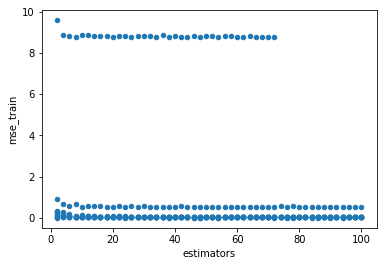

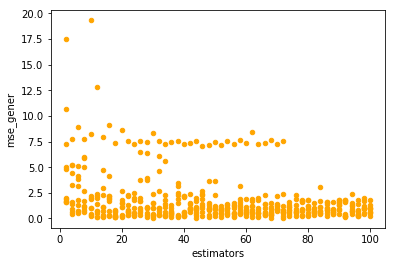

In [88]:
plt.figure()
df.plot.scatter(x="estimators", y ="mse_train")
df.plot.scatter(x="estimators", y = "mse_gener",c='orange')
plt.show()

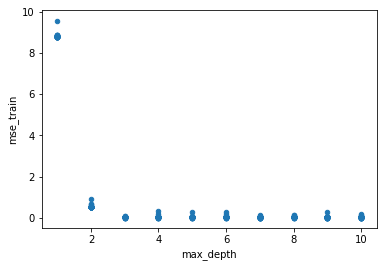

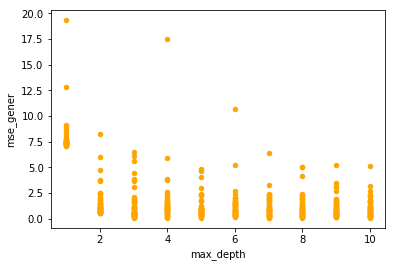

In [79]:
df.plot.scatter(x="max_depth", y = "mse_train")
df.plot.scatter(x="max_depth", y = "mse_gener",c='orange')

In [46]:
df.describe()

,estimators,max_depth,mse_train,mse_gener
count,486.000000,486.000000,486.000000,486.000000
mean,49.962963,5.629630,0.742770,5.950890
std,28.607667,2.811366,2.292880,7.384096
min,2.000000,1.000000,0.008333,0.145681
25%,26.000000,3.000000,0.025969,2.132687
50%,50.000000,6.000000,0.033999,3.980000
75%,74.000000,8.000000,0.059990,7.110978
max,100.000000,10.000000,9.568000,83.750000


#### get the best model

In [47]:
df.sort_values(by=["mse_gener"]).head()

,estimators,max_depth,mse_train,mse_gener
352,30,8,0.056162,0.145681
143,12,4,0.068171,0.249583
159,44,4,0.025050,0.268115
123,72,3,0.027593,0.295573
40,6,2,0.578006,0.304891


In [204]:
model = joblib.load("/storage/yw18581/data/trained_models/Leaf_position_regression/leaf_regression_RF_30est_8depth.pkl")

In [206]:
preds_5cl = model.predict(reshape_RF(cut_X(X_test_5classes)))

In [207]:
mean_squared_error(y_test_5classes, preds_5cl)

0.06557777777777778

In [208]:
preds_15mm = model.predict(X_15mm_RF)

In [209]:
mean_squared_error(y_15mm, preds_15mm)

0.14568148148148144

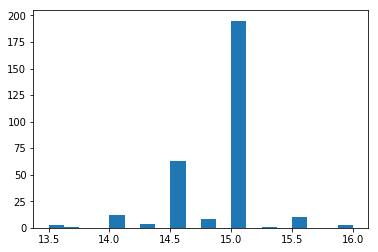

In [220]:
plt.hist(preds_15mm, bins=20)
plt.show()

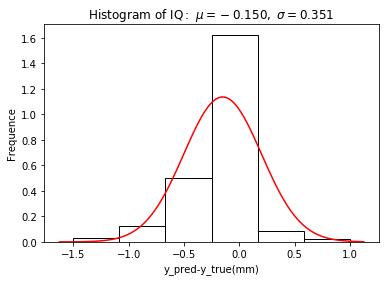

In [257]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = preds_15mm-y_15mm
mean,std=norm.fit(data)

plt.hist(data, bins=6, normed=True, facecolor='white',edgecolor ="k",  alpha=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, c='r')
plt.xlabel('y_pred-y_true(mm)')
plt.ylabel('Frequence')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()

In [48]:
rf_grid = joblib.load("rf_rand_grd_search_best_estimator.pkl")

In [49]:
preds_test= rf_grid.predict(X_test_RF)

In [50]:
mean_squared_error(y_test, preds_test)

0.025301666666666636

In [51]:
preds_15mm = rf_grid.predict(X_15mm_RF)

In [52]:
mean_squared_error(y_15mm, preds_15mm)

3.782362666666667

/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


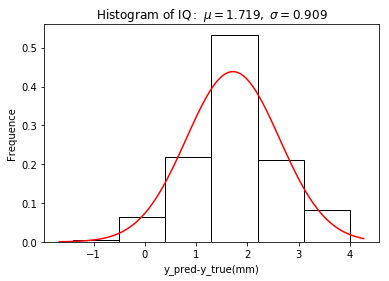

In [53]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = preds_15mm-y_15mm
mean,std=norm.fit(data)

plt.hist(data, bins=6, normed=True, facecolor='white',edgecolor ="k",  alpha=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, c='r')
plt.xlabel('y_pred-y_true(mm)')
plt.ylabel('Frequence')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()

In [55]:
rf_grid.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
# %load Leaf_regression_RF_gridsearchCV.py
#!/usr/bin/env python

import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
import os.path as p
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

In [24]:

estimators = (2, 4, 8, 10, 20, 30, 50, 70, 100, 200, 300)
tuned_parameteres = {"n_estimators": estimators}#, 'max_depth': depths}#,
                    #'min_samples_split': [1, 2, 3]}
X_train_RF = np.vstack((X_train_RF, X_val_RF))
print(X_train_RF.shape)

y_train = np.hstack((y_train,y_val))
y_train.shape

print(X_train_RF.shape, y_train.shape)

from sklearn.model_selection import StratifiedKFold
X = X_train_RF
y = y_train
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)


(960, 272000)
(960, 272000) (960,)


5

In [26]:

model = GridSearchCV(RandomForestRegressor(criterion='mse',verbose=1), 
                     tuned_parameteres, cv=skf, verbose=10, n_jobs=4)

model.fit(X_train_RF, y_train)

print(model.best_params_)




Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   30.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 16.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 35.5min


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
rf_best = model.best_estimator_
#joblib.dump(model.best_estimator_, 'rf_best_estimator.pkl', compress=1)




#### feature importance

In [99]:
np.shape(model.feature_importances_)

(272000,)

In [101]:
cut_X(X_test_5classes).shape

(300, 340, 800, 1)

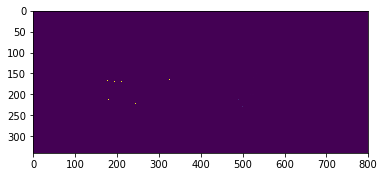

In [102]:
plt.imshow(model.feature_importances_.reshape(340, 800))

In [106]:
print(model.feature_importances_.reshape(340,800))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [107]:
importances = model.feature_importances_

In [108]:
std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)

In [109]:
indices = np.argsort(importances)[::-1]

In [115]:
340*800

272000

In [127]:
index_map = []
for i in range(341):
    for j in range(801):
        index_map.append([i*j, i, j])
index_map = np.asarray(index_map)

In [150]:
np.where(np.asarray([i+1 for i in range(272000)]).reshape(340,800)==181180)

(array([226]), array([379]))

In [118]:
[i*j for i, j in zip(range(340), range(800))]

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 2

In [163]:
ind = []
for f in range(X_test_5classes.shape[1])[:100]:
    print("%{}. feature [{},{}] ({})".format(f + 1, np.int(np.where(np.asarray([i+1 for i in range(272000)]).reshape(340,800)==indices[f])[0]),
                                             np.int(np.where(np.asarray([i+1 for i in range(272000)]).reshape(340,800)==indices[f])[1]) , importances[indices[f]]))
    ind.append([np.int(np.where(np.asarray([i+1 for i in range(272000)]).reshape(340,800)==indices[f])[0]), 
                np.int(np.where(np.asarray([i+1 for i in range(272000)]).reshape(340,800)==indices[f])[1])])

%1. feature [226,379] (0.030311828499006134)
%2. feature [201,197] (0.03022787734231869)
%3. feature [222,355] (0.030175310452713638)
%4. feature [214,285] (0.030116713540131533)
%5. feature [197,204] (0.030075710831934947)
%6. feature [170,193] (0.030060958365009112)
%7. feature [153,333] (0.030054821527111166)
%8. feature [204,285] (0.029997617509098913)
%9. feature [204,375] (0.02995775559427898)
%10. feature [176,196] (0.02992454868411568)
%11. feature [149,382] (0.029915066262632354)
%12. feature [181,340] (0.02989327050415875)
%13. feature [169,328] (0.029882635119232993)
%14. feature [153,192] (0.029855349377178764)
%15. feature [157,143] (0.029806866275758903)
%16. feature [199,185] (0.02980345743181955)
%17. feature [159,202] (0.029771994662708738)
%18. feature [154,221] (0.029767113471507196)
%19. feature [209,183] (0.029744370722858248)
%20. feature [170,210] (0.02972949857393021)
%21. feature [190,322] (0.02972701918784872)
%22. feature [149,290] (0.029693639668848925)
%23.

In [170]:
ind = np.asarray(ind)

In [181]:
maps = np.zeros(shape=(340,800))

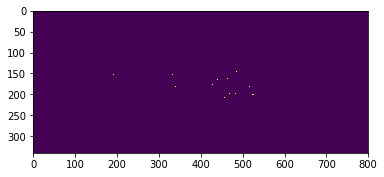

In [196]:
plt.figure()
maps = np.zeros(shape=(340,800))
for idx in ind:
    maps[idx[0], idx[1]]=1
plt.imshow(maps)

In [194]:
np.where(maps!=0)

(array([113]), array([276]))

In [180]:
maps[ind[0][0], ind[0][1]]=1

ValueError: shape mismatch: objects cannot be broadcast to a single shape

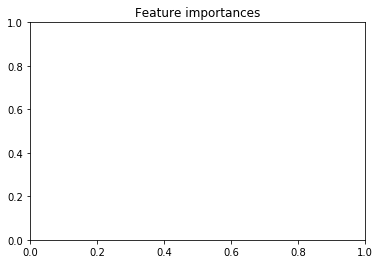

In [112]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test_5classes.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test_5classes.shape[1]), indices)
plt.xlim([-1, X_test_5classes.shape[1]])
plt.show()